국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액

- 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

- K-Beauty란? K-Beauty - Wikipedia
- e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [2]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

데이터 로드하기

In [4]:
df_raw = pd.read_csv(".\\국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220204140713.csv", encoding="cp949")
df_raw.shape

(450, 27)

In [5]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [6]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0


분석과 시각화를 위한 tidy data 만들기

In [7]:
#집계를 한 데이터를 tidy data 형식으로 만들어야 합니다.
#melt를 사용해보겠습니다. melt는 행에 있는 데이터를 열로 옮기는 것입니다.
#id_vars로 id값으로 사용할 열을 지정하고, value_vars에는 value으로 들어가는 열을 지정합니다
#variable, value라는 column의 이름을 "기간", "million"으로 변경합니다.
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


데이터 전처리

기간에서 연도를 분리하기

In [8]:
df["연도"] = df["기간"].map(lambda x: x.split()[0])
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531,2019
10797,기타,기 타,계,2019 4/4,1094,2019
10798,기타,기 타,면세점,2019 4/4,1,2019


In [9]:
int("2019 3/4 p)".split()[1].split("/")[0])

3

In [10]:
df["분기"] = df["기간"].apply(lambda  x : x.split()[1].split("/")[0])
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [11]:
df["million"] = df["million"].replace("-", pd.np.nan).astype(float)
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


필요없는 데이터 제거하기

In [12]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & 
        (df["상품군별"] != "합계") & 
        (df["판매유형별"] != "계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10793,기타,농축수산물,면세점 이외,2019 4/4,2.0,2019,4
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048 entries, 49 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  6048 non-null   object 
 1   상품군별     6048 non-null   object 
 2   판매유형별    6048 non-null   object 
 3   기간       6048 non-null   object 
 4   million  3024 non-null   float64
 5   연도       6048 non-null   int32  
 6   분기       6048 non-null   int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 330.8+ KB


In [14]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

K-Beauty 시각화

전체 상품군 판매액

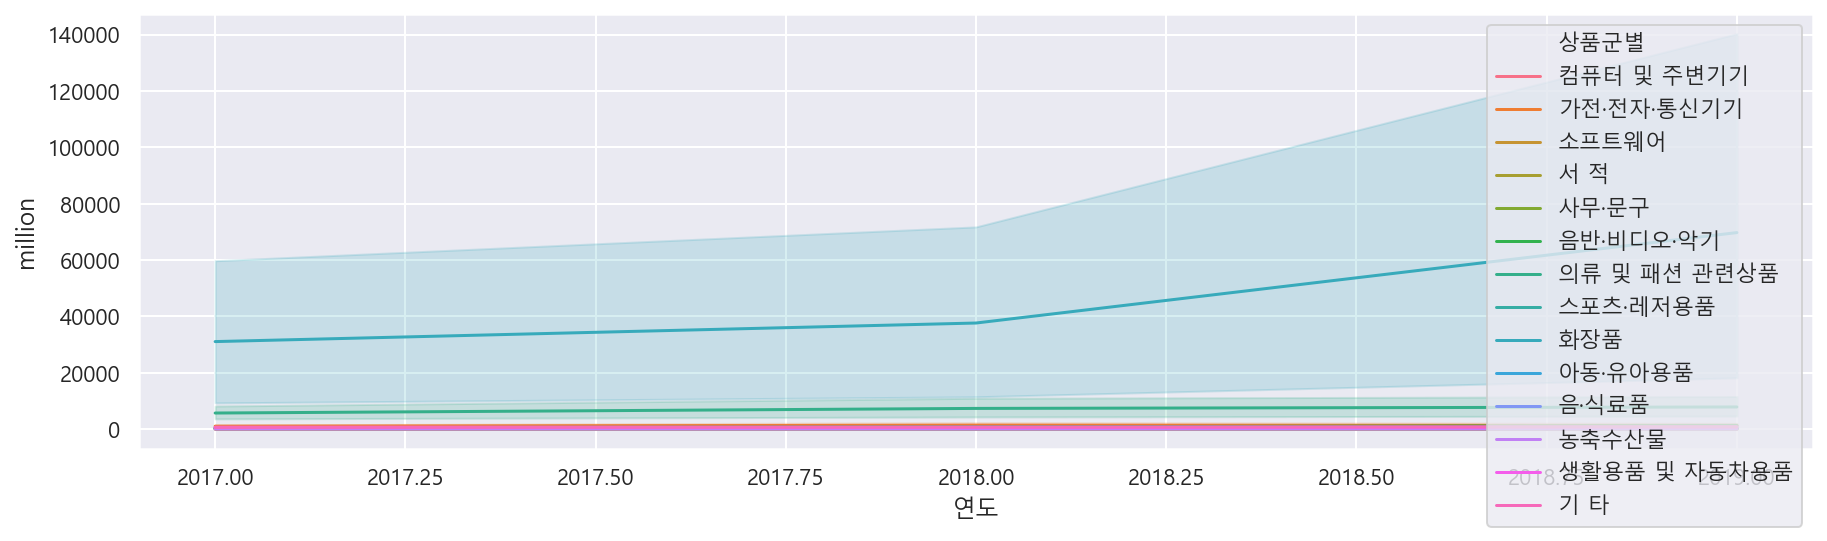

In [15]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df, hue="상품군별")

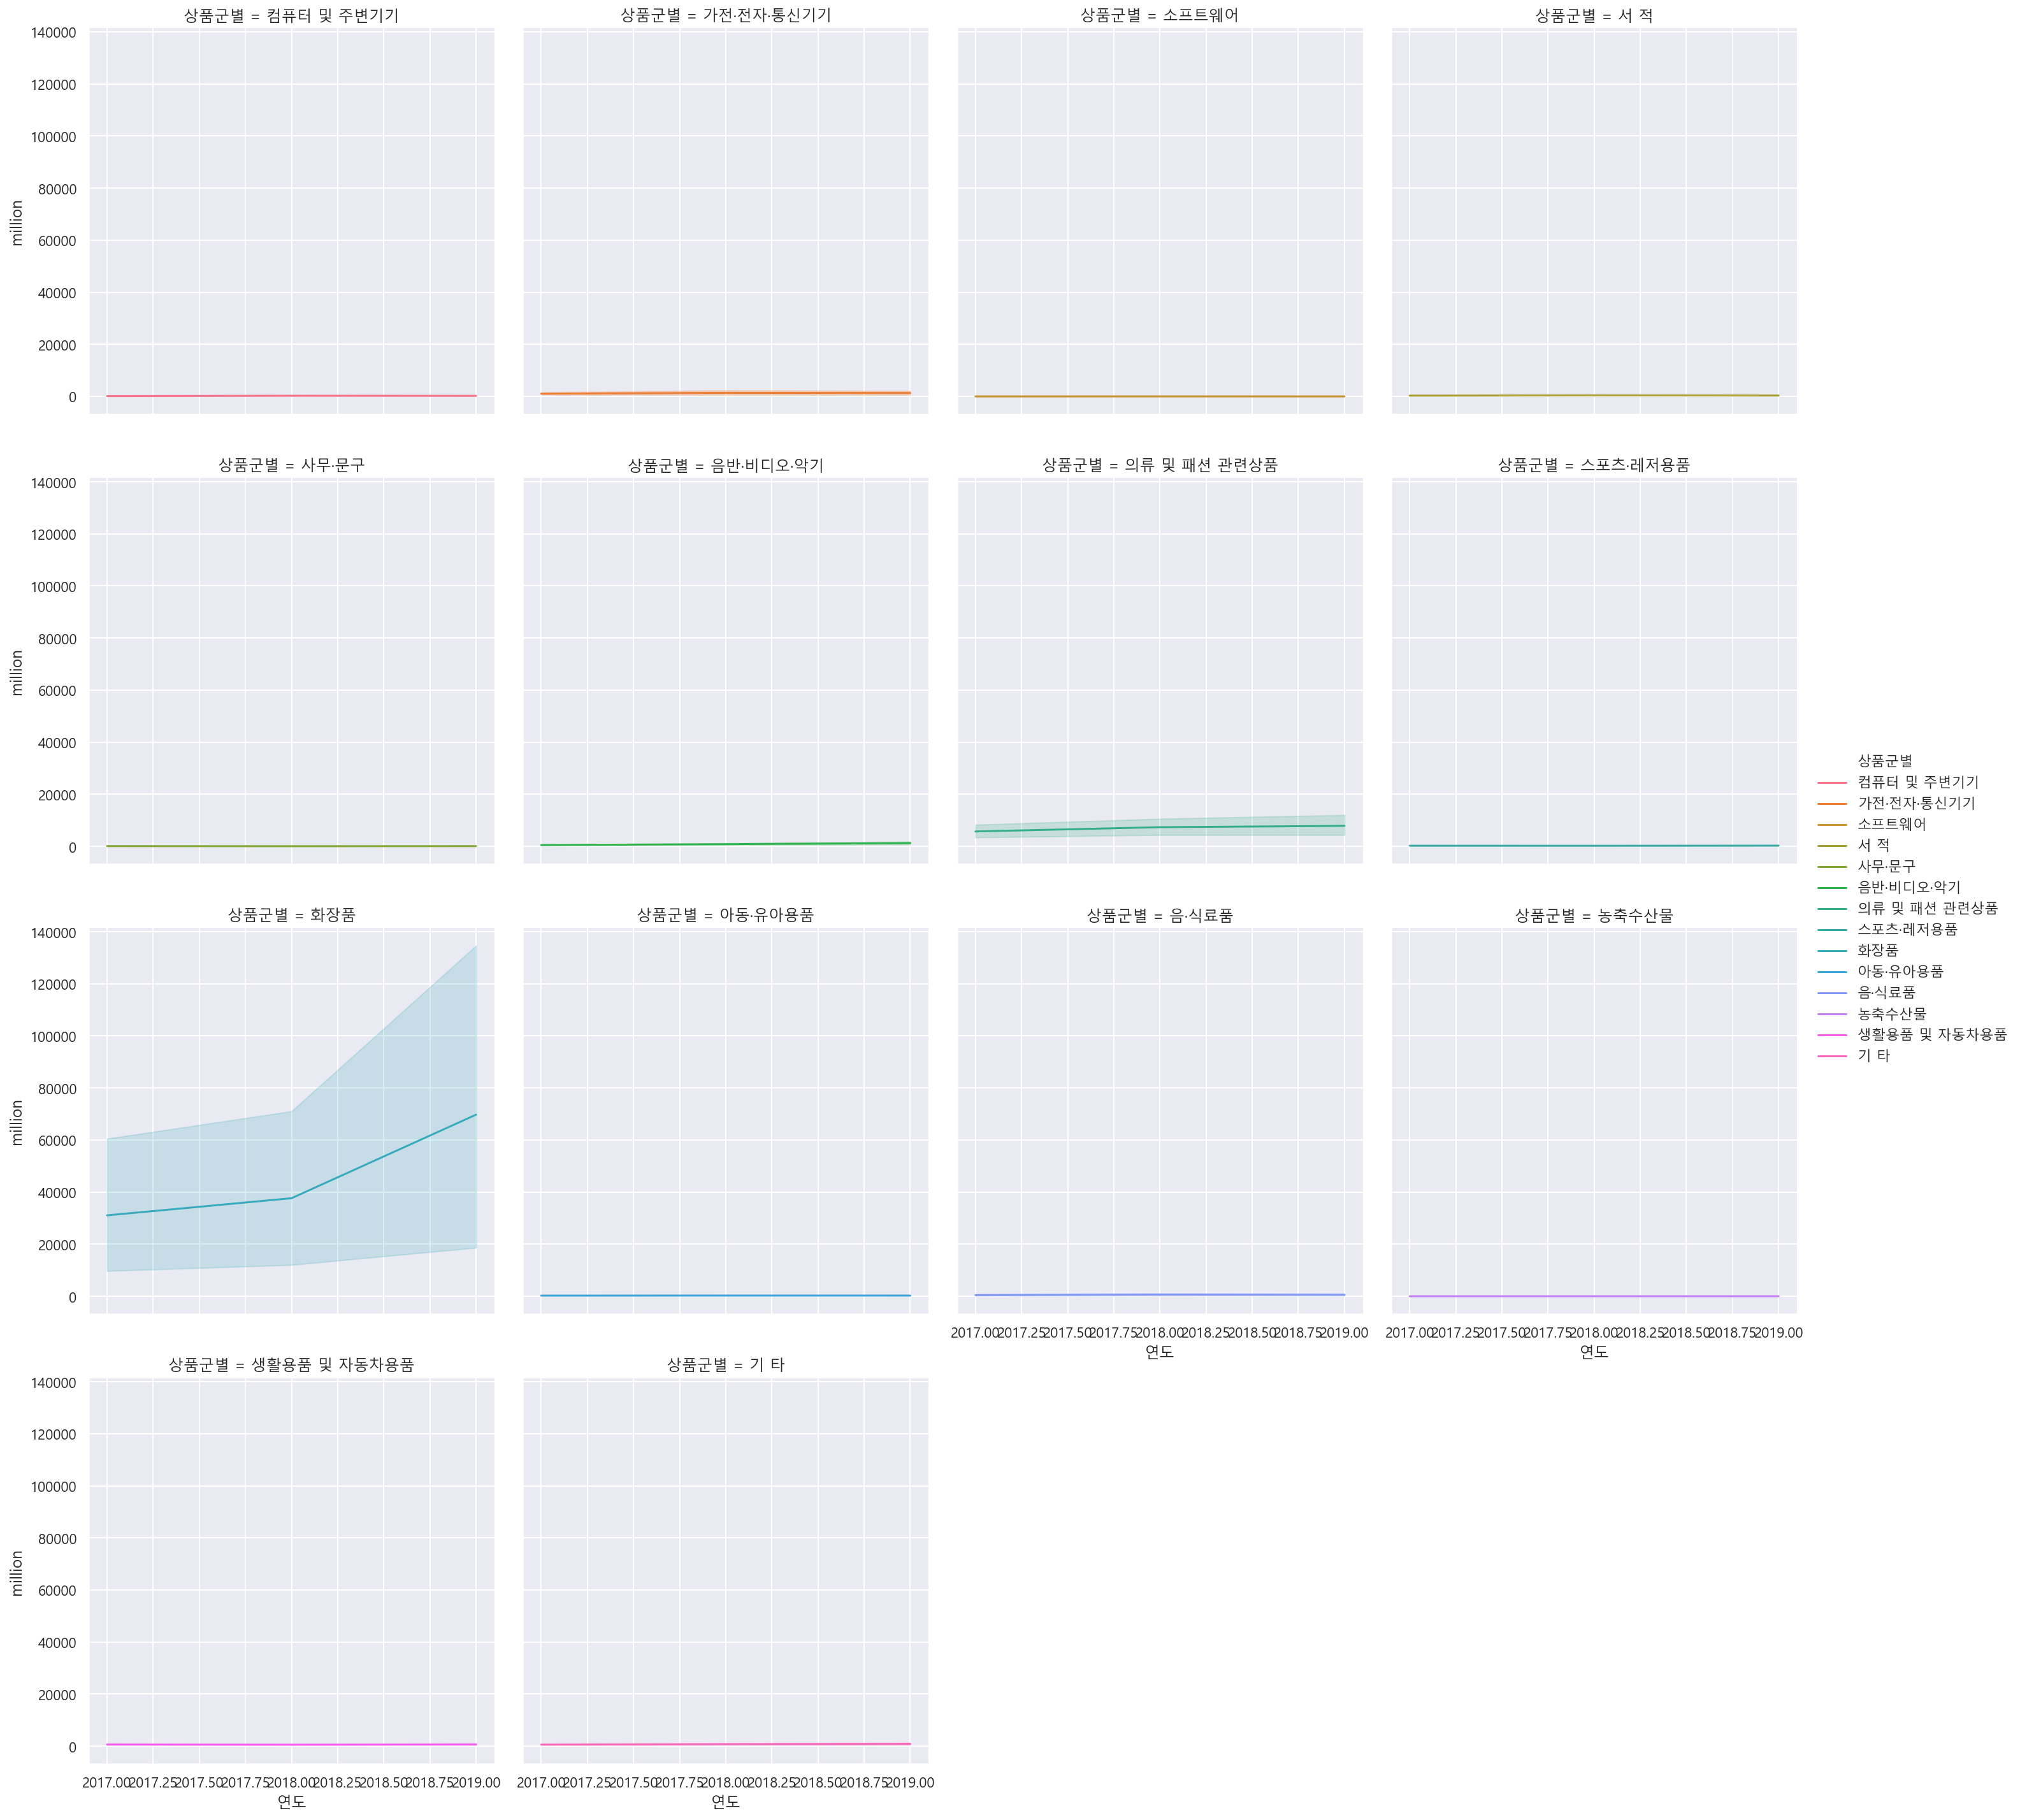

In [16]:
sns.relplot(x="연도", y="million", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [17]:
df_sub =  df[~df["상품군별"].isin(["화장품"])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10793,기타,농축수산물,면세점 이외,2019 4/4,2.0,2019,4
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


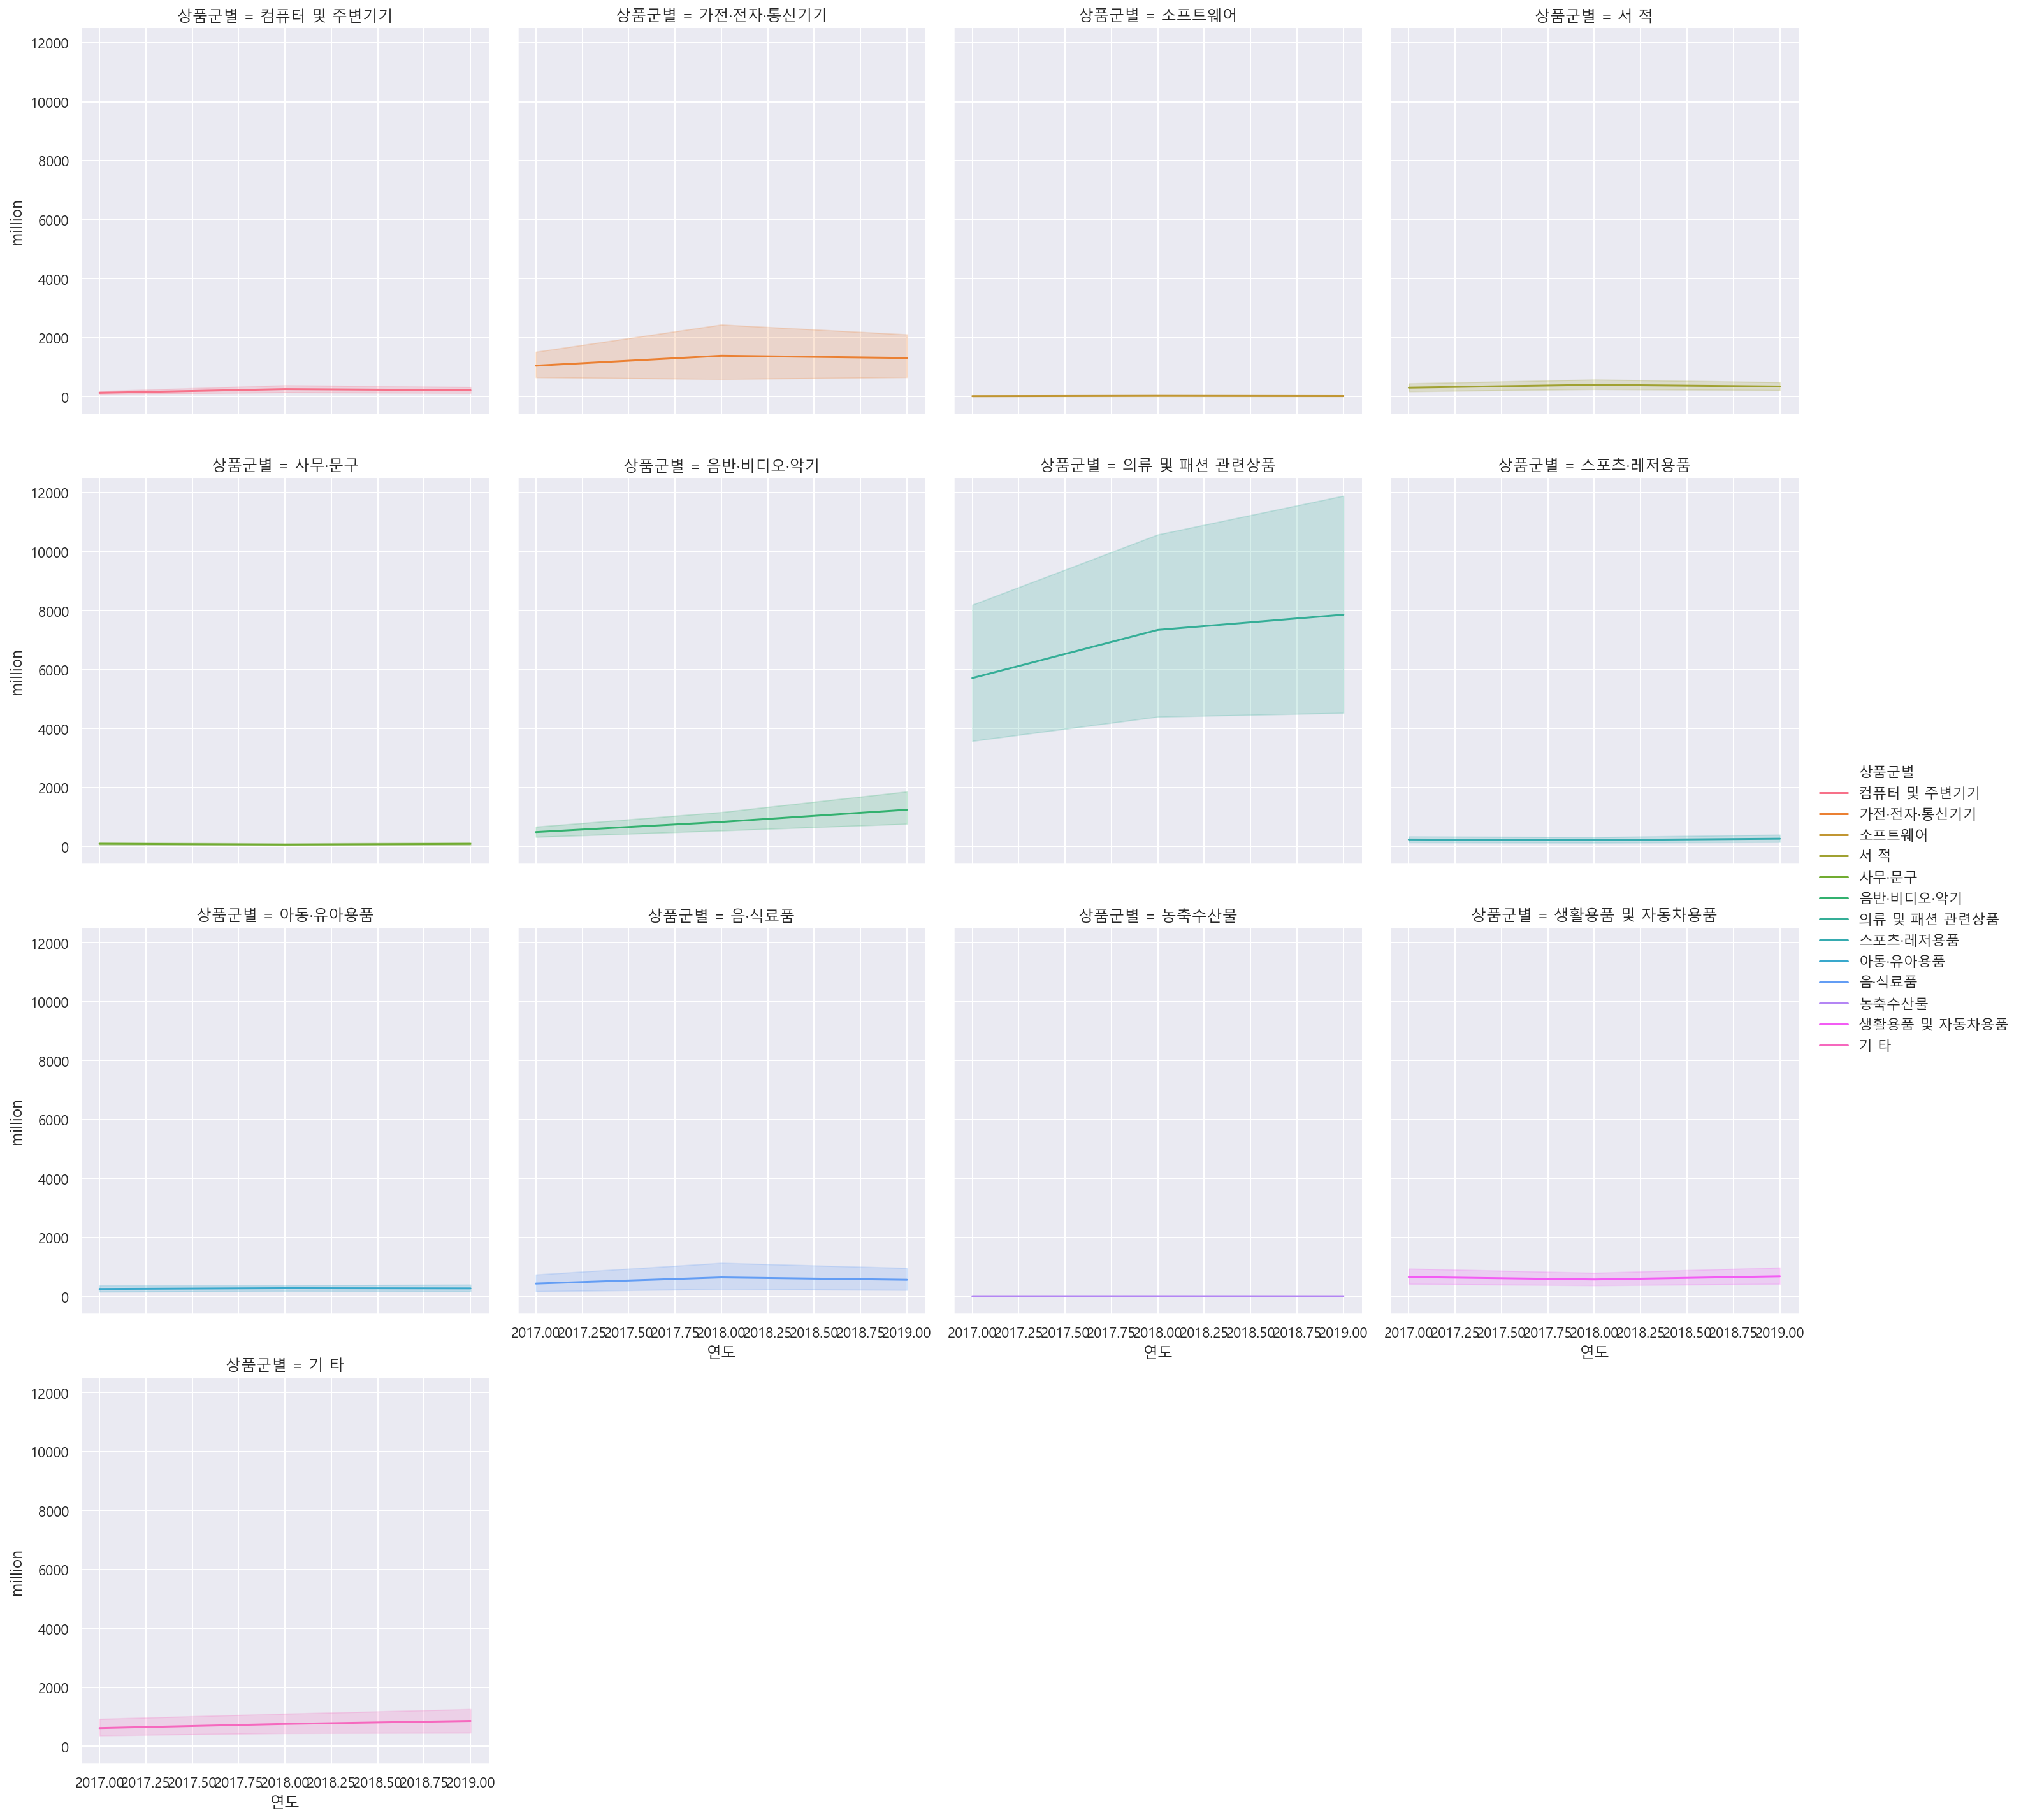

In [18]:
sns.relplot(x="연도", y="million", data=df_sub, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

화장품의 온라인쇼핑 해외직접판매액

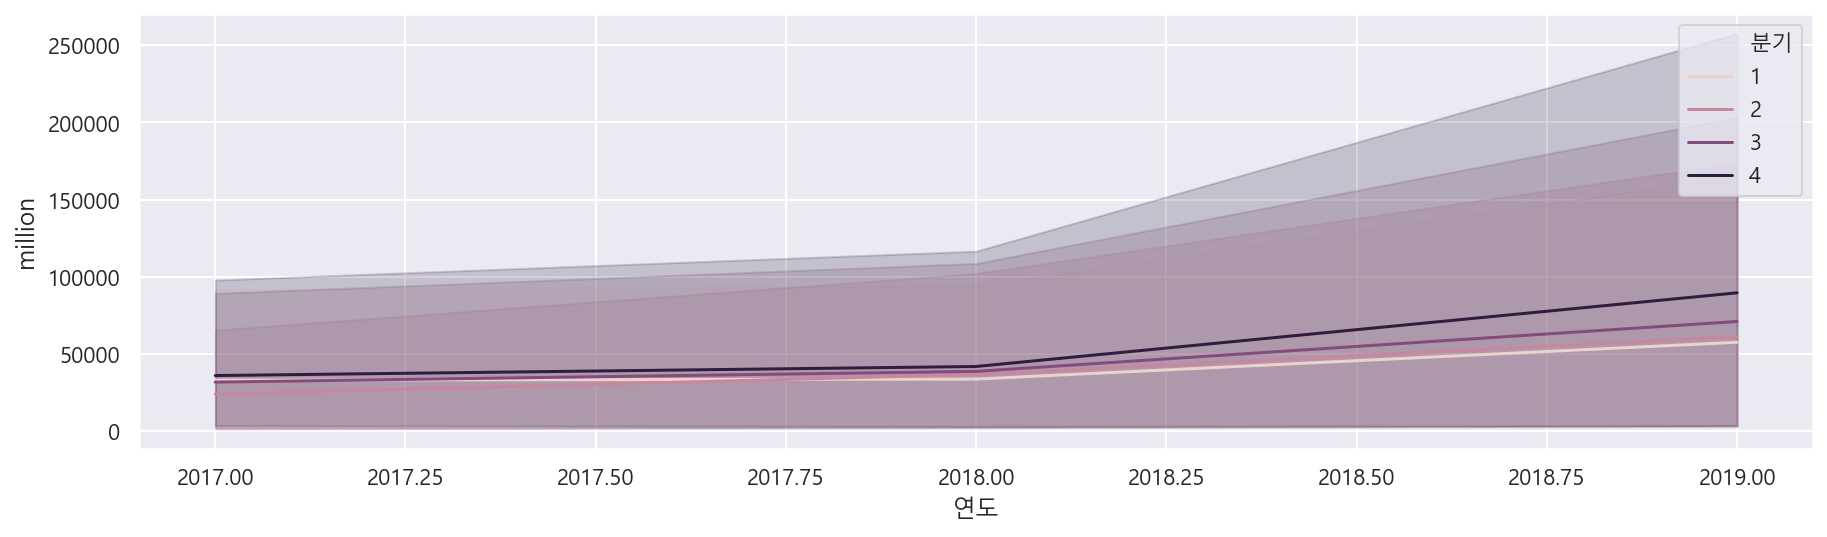

In [19]:
df_cosmetic = df[(df["상품군별"] == "화장품")]
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

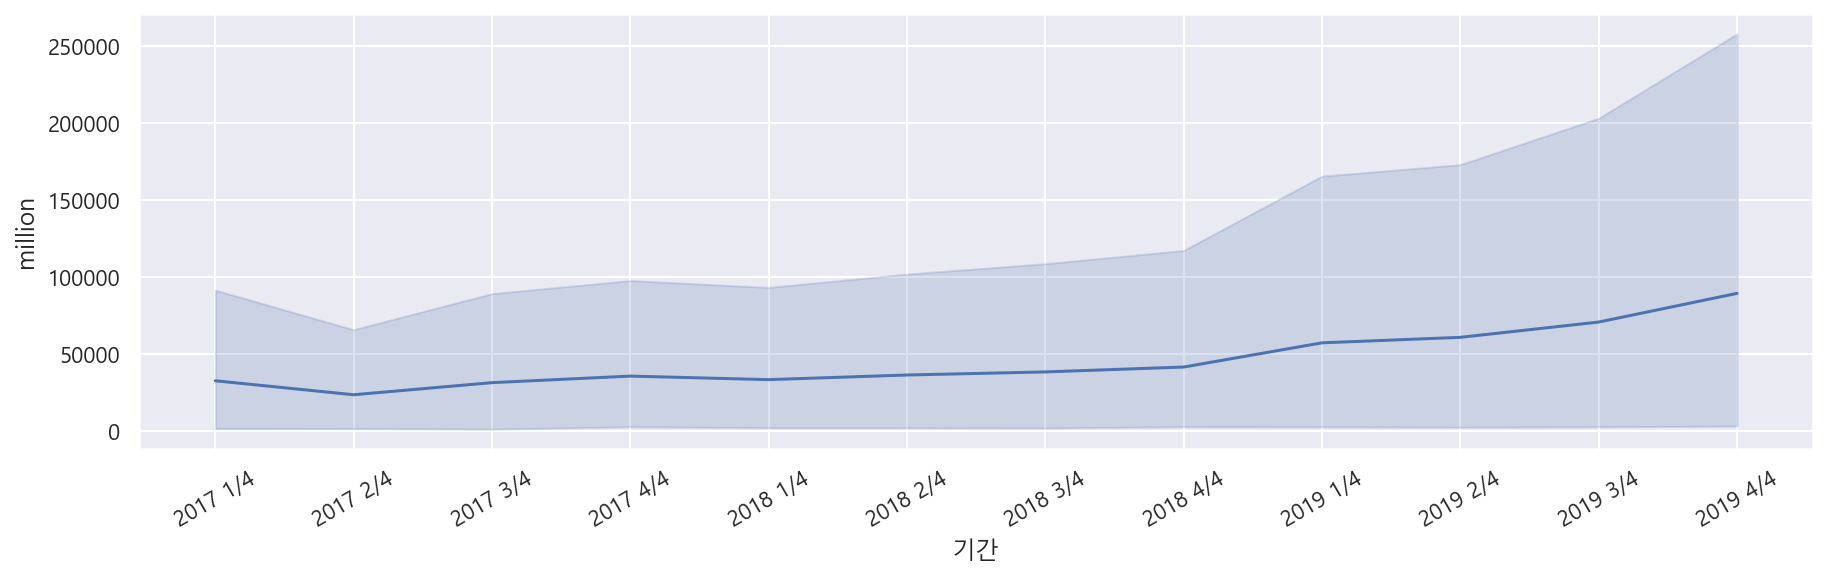

In [20]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

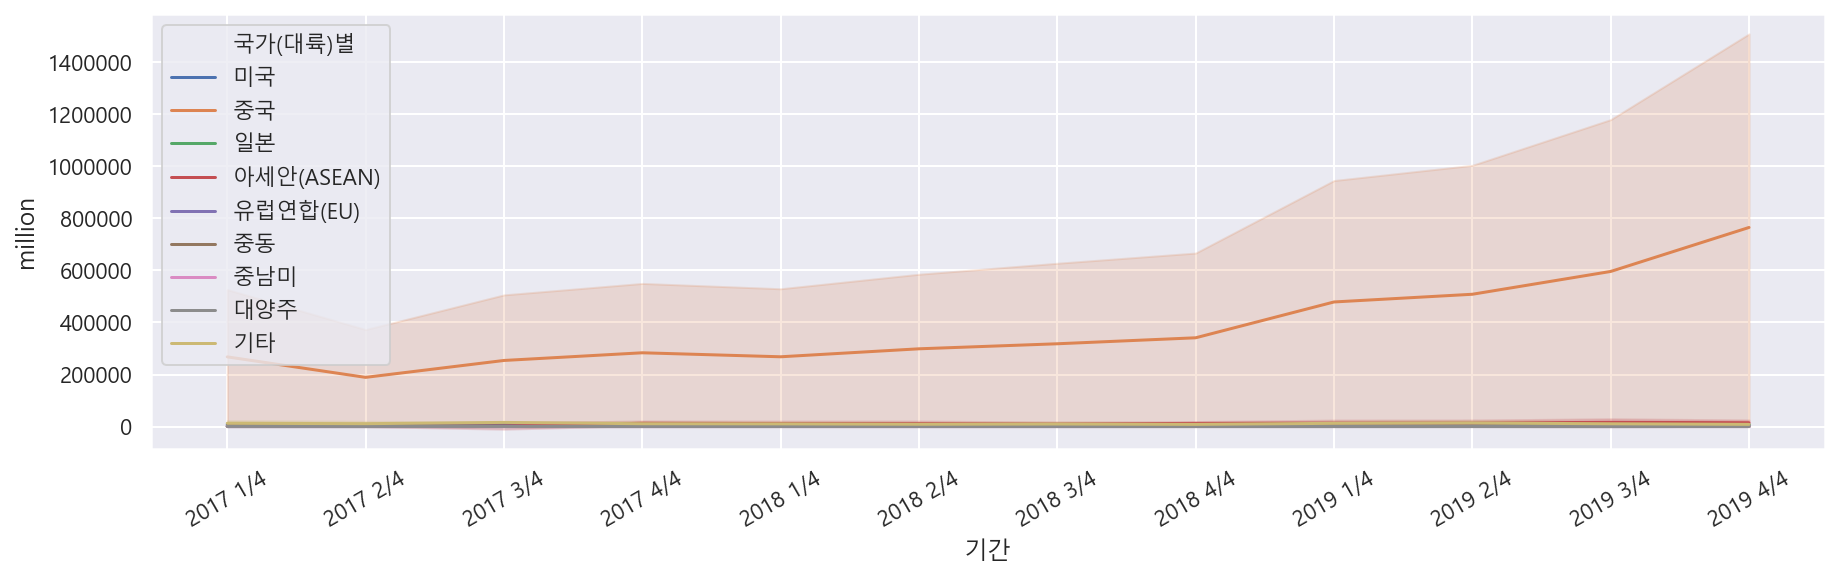

In [21]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

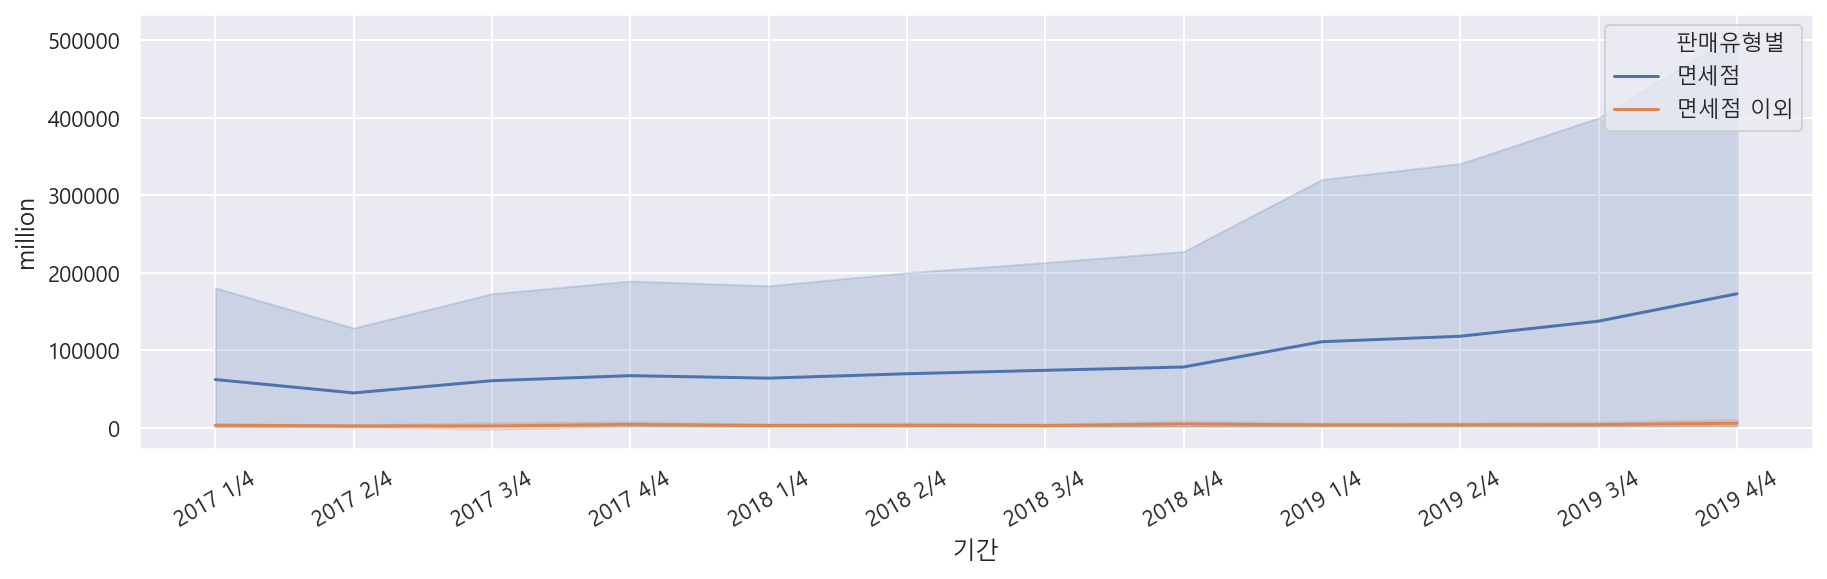

In [22]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="판매유형별")

의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

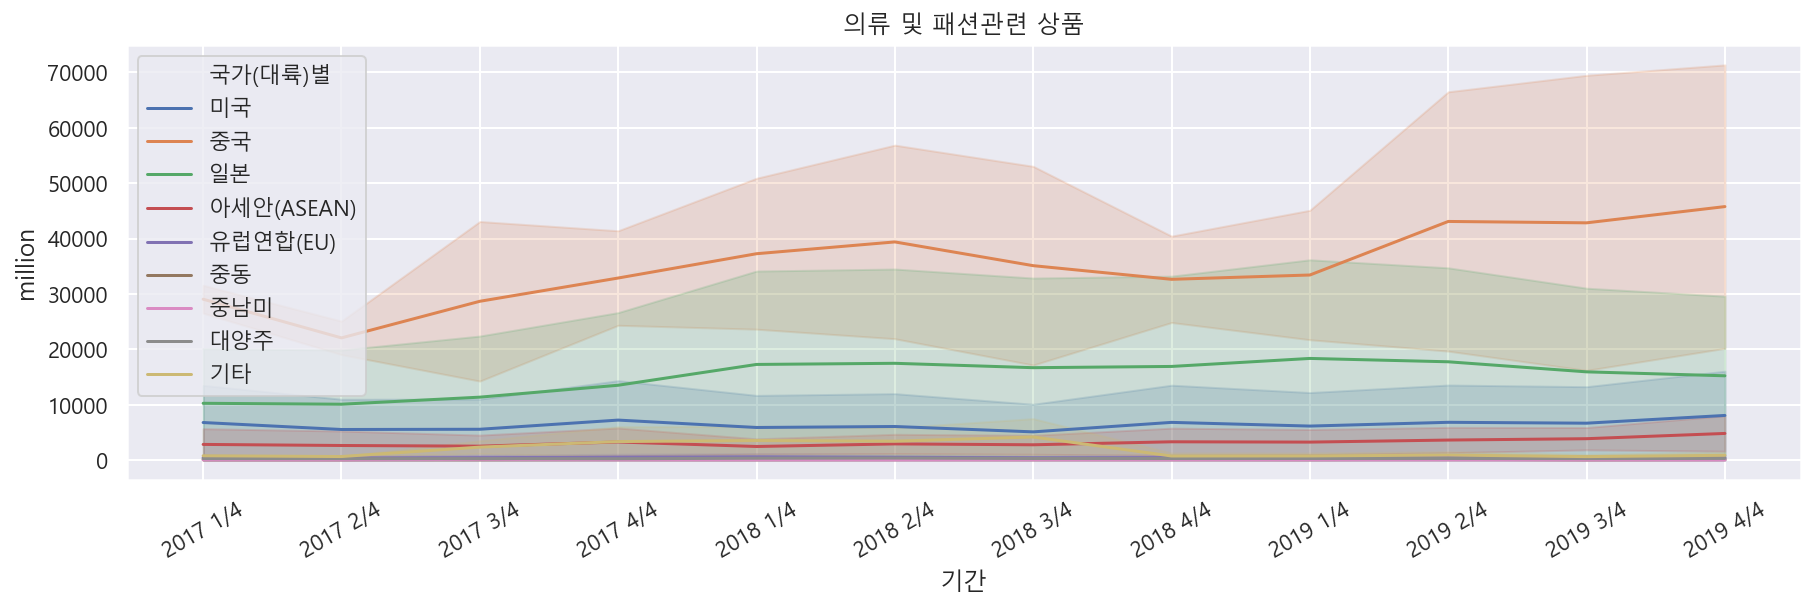

In [23]:
df_fashion = df[df["상품군별"].str.contains("의류")]
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

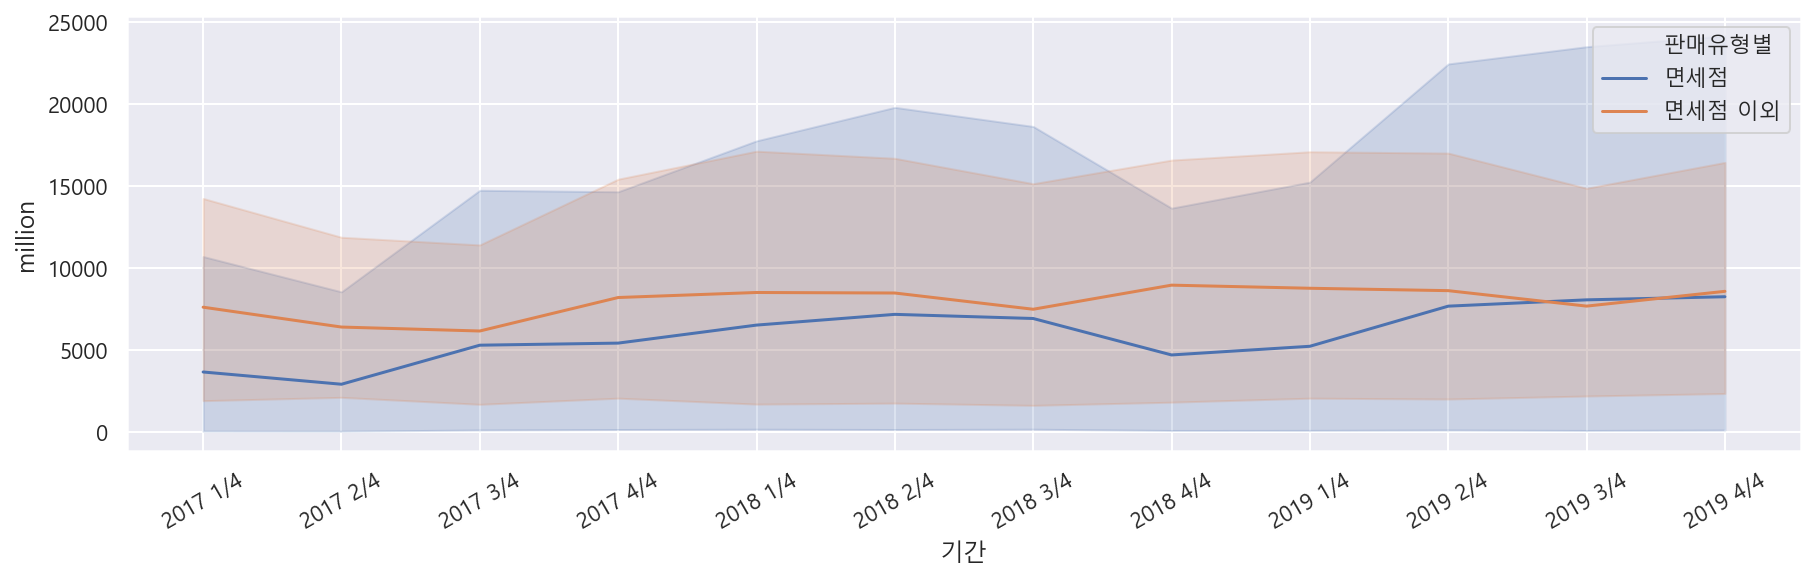

In [24]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="판매유형별")

데이터 집계하기

In [27]:
pivot = df_fashion.pivot_table(index="국가(대륙)별", values="million", columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,0.0,0.0,0.0,14387.0,23901.0,6475.0
대양주,0.0,0.0,0.0,2266.0,2725.0,2489.0
미국,0.0,0.0,0.0,50353.0,47875.0,55536.0
아세안(ASEAN),0.0,0.0,0.0,22671.0,23068.0,31247.0
유럽연합(EU),0.0,0.0,0.0,3736.0,4114.0,3694.0
일본,0.0,0.0,0.0,90584.0,136800.0,134637.0
중국,0.0,0.0,0.0,225407.0,288848.0,330267.0
중남미,0.0,0.0,0.0,762.0,576.0,544.0
중동,0.0,0.0,0.0,772.0,879.0,951.0


연산결과를 시각적으로 보기

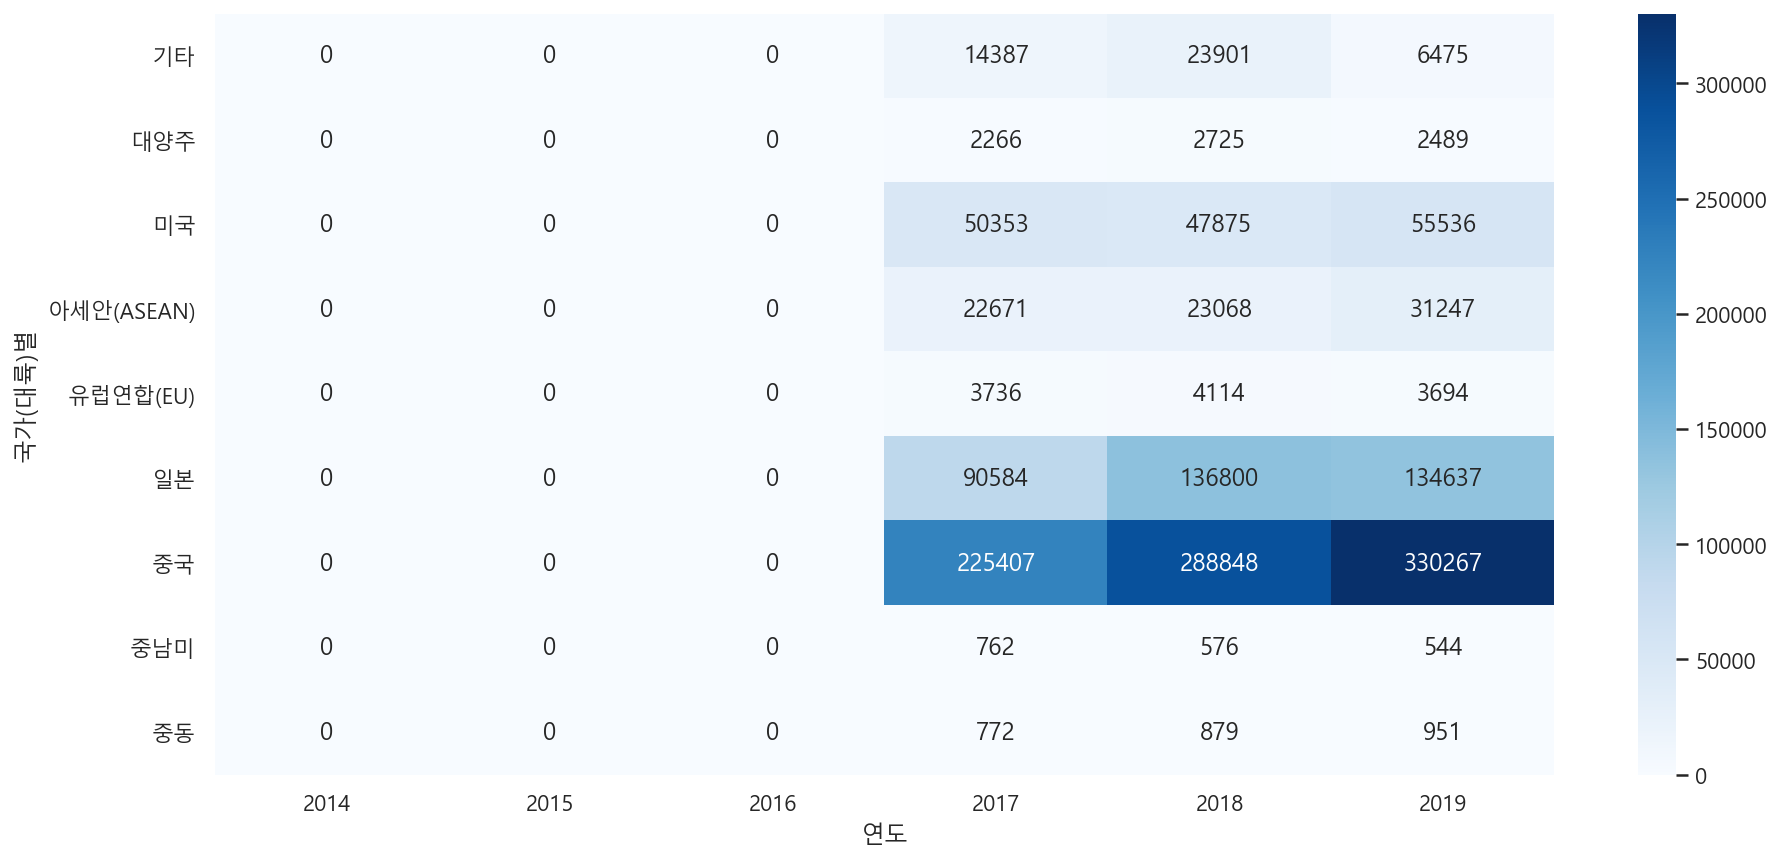

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

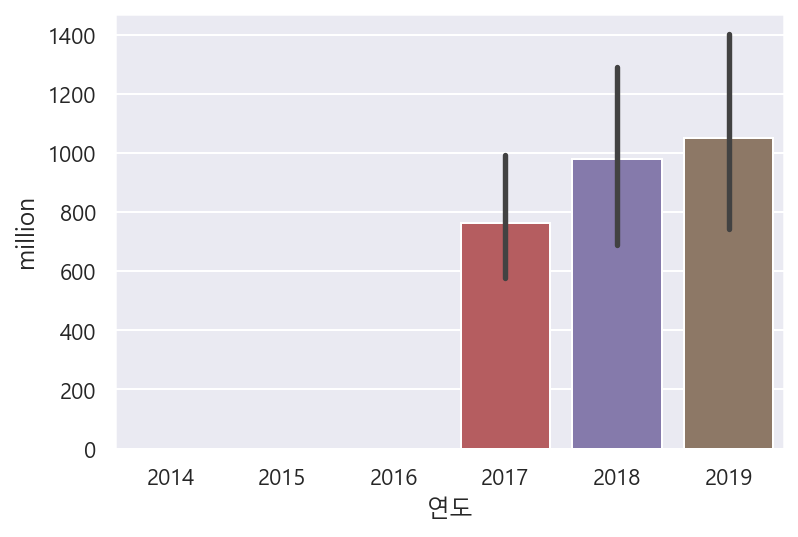

In [29]:
sns.barplot(x="연도", y="million", data=df_sub)

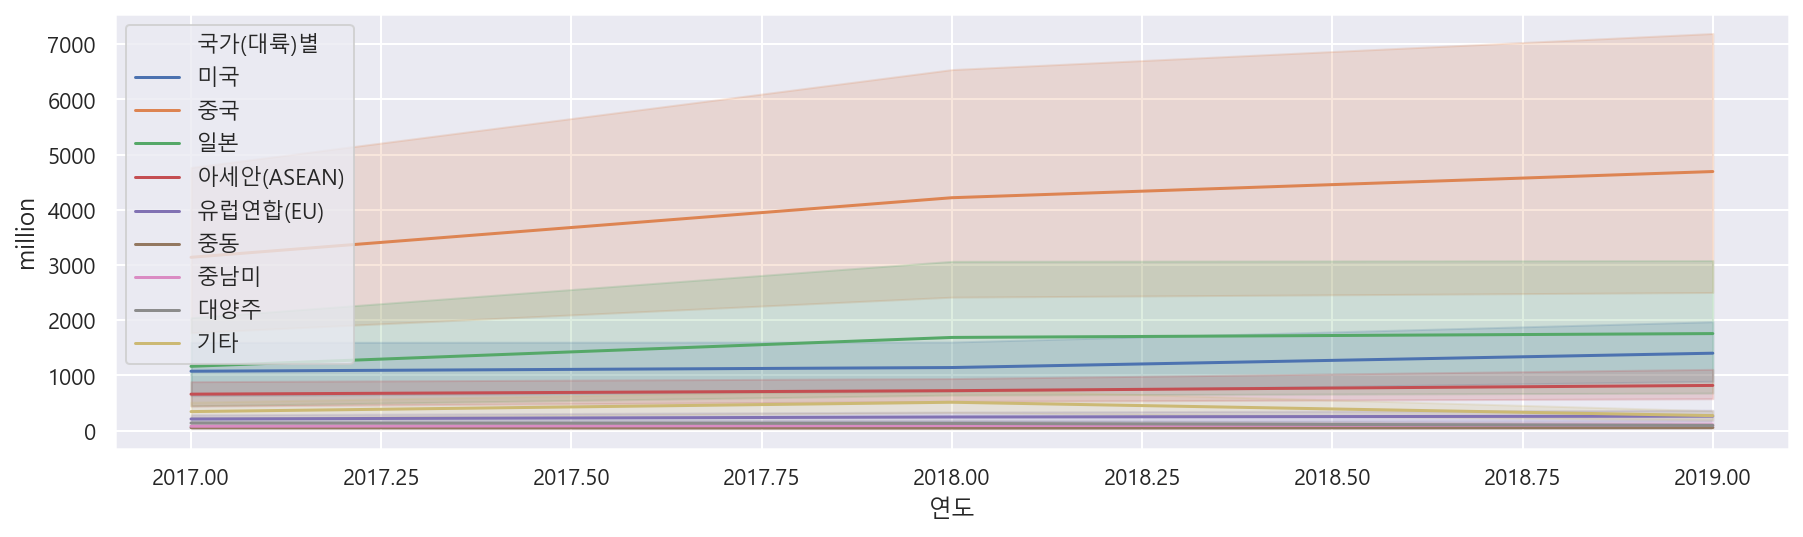

In [30]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="국가(대륙)별")

lengend를 그래프의 밖에 그리기

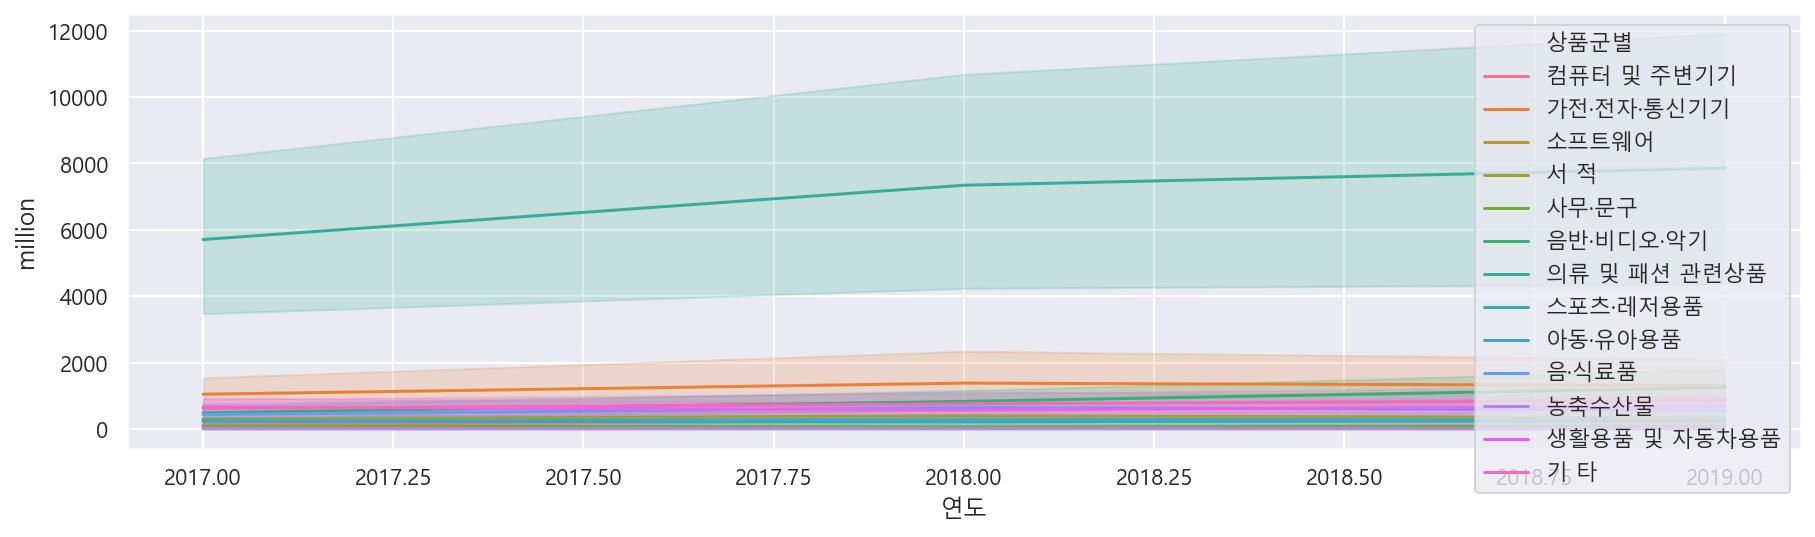

In [31]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")